# Neural Networks

## Map of Machine Learning 
![Alt text](https://i.pinimg.com/originals/6e/9b/dd/6e9bdde9d485fe2476738ab1733e8d49.png)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap

warnings.filterwarnings('ignore')

np.random.seed(0)

## Neural Networks
* Function approximators

### OR Function

In [2]:
df = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,1]],columns=['x1','x2','y'])
df.head()

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [3]:
df['bias'] = 1
X = df[['bias','x1','x2']].values; Y = df['y'].values

## Plotting OR

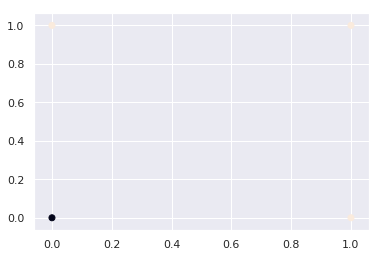

In [4]:
plt.scatter(df['x1'],df['x2'],c=df['y'])
plt.show()

## Perceptron Learning

In [5]:
alpha = 0.01                            # set learning rate
theta = np.random.randn(3)              # init weights

J = []                                  # store cost
for i in range(1000):
    y_hat = np.dot(X, theta) > 0        # make predictions
    err = Y - y_hat                     # measure error
    gradient = - np.dot(err, X)         # compute gradients
    
    J.append(0.5*np.dot(err.T,err))     # store cost
    
    theta -= alpha * gradient           # weight update

## Predictions after learning

In [6]:
df['Prediction'] = np.dot(X,theta) > 0

df[['x1','x2','y','Prediction']]

,x1,x2,y,Prediction
0,0,0,0,False
1,0,1,1,True
2,1,0,1,True
3,1,1,1,True


## Plotting Cost

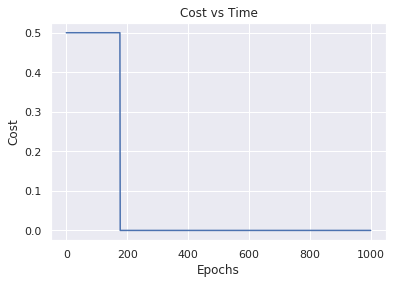

In [7]:
plt.plot(J)
plt.xlabel('Epochs'); plt.ylabel('Cost'); plt.title('Cost vs Time')
plt.show()

## Visualize Decision Boundary

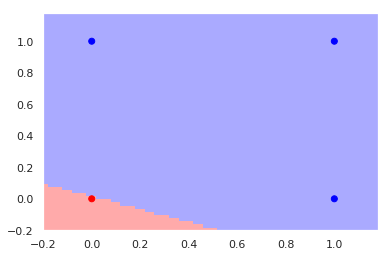

In [8]:
xx, yy = np.meshgrid(np.arange(-.2, 1.2, .02),np.arange(-.2, 1.2, .02))
Z = np.dot(np.c_[np.ones(len(xx.ravel())),xx.ravel(), yy.ravel()], theta) > 0
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z,cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(df['x1'],df['x2'],c=df['y'],cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.show()

# XOR Function

In [9]:
df = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,0]],columns=['x1','x2','y'])
df.head()

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [10]:
df['bias'] = 1
X = df[['bias','x1','x2']].values; Y = df['y'].values.reshape(4,1)

## Plotting XOR

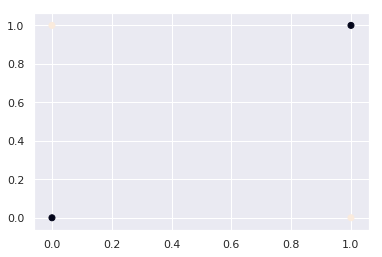

In [11]:
plt.scatter(df['x1'],df['x2'],c=df['y'])
plt.show()

## Multi Layer Perceptron

In [12]:
alpha = 0.01                                 # set learning rate
theta_1 = np.random.randn(3,2)               # init weights
theta_2 = np.random.randn(2,1)        

J = []                                       # store cost
for i in range(10000):
    l1 = np.dot(X, theta_1)                  # l1 = X * theta_1
    y_hat = np.dot(l1, theta_2)              # Y_hat = l1 * theta_2
    
    err = Y - y_hat                          # measure error
    dJ_dtheta2 = - np.dot(l1.T, err)         # compute gradients
    
    J.append(0.5*np.dot(err.T,err).squeeze())# store cost

    theta_2 -= alpha * dJ_dtheta2            # weight update
    dJ_dl1 = np.dot(err, theta_2.T)
    
    theta_1 -= alpha * np.dot(X.T, dJ_dl1)

## Visualize Decision Boundary

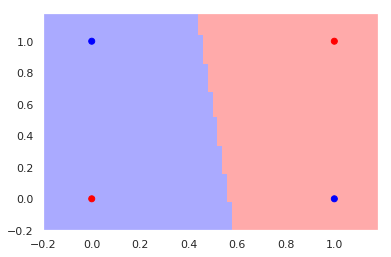

In [13]:
xx, yy = np.meshgrid(np.arange(-.2, 1.2, .02),np.arange(-.2, 1.2, .02))
Z = np.dot(np.dot(np.c_[np.ones(len(xx.ravel())),xx.ravel(), yy.ravel()],theta_1), theta_2)  > 0
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z,cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(df['x1'],df['x2'],c=df['y'],cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.show()

# Multi Layer Perceptron - Non Linear Activations

In [14]:
zeros = np.zeros((4,2))
for i in range(4):
    zeros[i, Y[i][0]] = 1
Y = zeros
X = df[['x1','x2']].values

In [15]:
def relu(z):
    return z * (z > 0)

def d_relu(g):
    return g>0 

def d_softmax(Y_hat, Y):
    return Y_hat - Y

def softmax(z):
    # subracting the max adds numerical stability
    shiftx = z - np.max(z,axis=1)[:,np.newaxis]
    exps = np.exp(shiftx)
    return exps / np.sum(exps,axis=1)[:,np.newaxis]

In [16]:
alpha = 0.01                                              # set learning rate
theta_1 = np.random.normal(0,.1,size=(2,3)); b1 = np.zeros((1,3))   # init weights
theta_2 = np.random.normal(0,.1,size=(3,2)); b2 = np.zeros((1,2))       

J = []                                                    
for i in range(10000):
    l1 = relu(np.dot(X, theta_1) + b1)                     # l1 = X * theta_1
    y_hat = softmax(np.dot(l1, theta_2) + b2)              # Y_hat = l1 * theta_2 + b

    cost = np.sum( - (Y * np.log(y_hat) + (1 - Y) * np.log(1 - y_hat)) )
    J.append(cost)                                         # store cost
    
    dJ_dZ2 = d_softmax(y_hat,Y)                            
    dJ_dtheta2 = np.dot(l1.T, dJ_dZ2)                      # compute gradients
    dJ_db2 = np.sum(dJ_dZ2, axis=0, keepdims=True)
    
    dJ_dZ1 = np.dot(dJ_dZ2, theta_2.T) * d_relu(l1)
    dJ_db1 = np.sum(dJ_dZ1, axis=0, keepdims=True)
    
    theta_2 -= alpha * dJ_dtheta2                         # weight update
    b2 -= alpha * dJ_db2
    theta_1 -= alpha * np.dot(X.T, dJ_dZ1)
    b1 -= alpha * dJ_db1
   
    if J[-1] == 0 or J[-1] > 10: break

## Plotting Cost

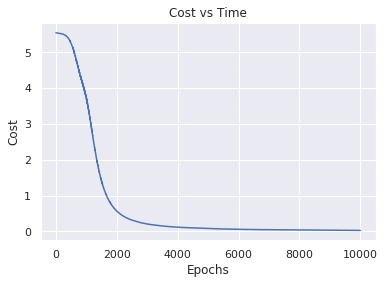

In [17]:
plt.plot(J)
plt.xlabel('Epochs'); plt.ylabel('Cost'); plt.title('Cost vs Time')
plt.show()

## Visualize Decision Boundary

In [18]:
xx, yy = np.meshgrid(np.arange(-.2, 1.2, .02),np.arange(-.2, 1.2, .02))
l1 = relu(np.dot(np.c_[xx.ravel(), yy.ravel()],theta_1) + b1)
Y_hat = softmax(np.dot(l1, theta_2) + b2)
Z = np.argmax(Y_hat, axis=1)
Z = Z.reshape(xx.shape) 

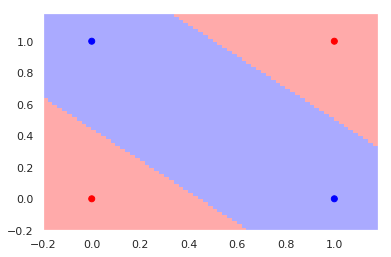

In [19]:
plt.pcolormesh(xx, yy, Z,cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(df['x1'],df['x2'],c=df['y'],cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.show()

![Alt Text](https://www.researchgate.net/profile/Hayder_Al-Behadili/publication/325999203/figure/download/fig4/AS:641844216074241@1530038994324/Overfitting-and-underfitting-effect-on-error.png)

## Learning Rate $\lambda$
![](https://cdn-images-1.medium.com/max/1600/0*uIa_Dz3czXO5iWyI.)

![](https://s3.ap-south-1.amazonaws.com/techleerimages/0f1b1b40-08f0-467d-9a35-0f0fe71e0a43.png)

![](https://cdn-images-1.medium.com/max/1600/1*OxAgYCBDKyXYLiWWUoKUcQ.png)

In [20]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K

from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# MNIST
![](https://camo.githubusercontent.com/d440ac2eee1cb3ea33340a2c5f6f15a0878e9275/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)

# Load Data

In [21]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32').reshape(-1,784)
x_test = x_test.astype('float32').reshape(-1,784)

x_train /= 255.; x_test /= 255.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 14s 1us/step


# Define a model

In [22]:
model = Sequential()
model.add(Dense(256, activation='relu',input_shape=(784,)))
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

# Visualize Model

In [23]:
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

# Train Model

In [ ]:
model.fit(x_train, y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test, y_test))